In [9]:
"""
------------------------------------------------------
This program is used to build a general structure to resolve some toy problems in AI.
Tha algorithms used here are BFS, DFS.
code written by jimmy shen on March, 2017.
----------------------------------------------------
"""

#Define problem, node, search class for the eight puzzle problem
import math
MAX_DPETH = 100
class Node():
    def __init__(self, node_state, parent_node, depth):
        self.node_state = node_state
        self.parent_node = parent_node
        self.depth = depth
    def get_hash_value(self):
        return hash(tuple(self.node_state))
    def get_parent_node(self):
        return self.parent_node
    def get_node_state(self):
        return self.node_state

class Problem():
    #the list is used to draw the board status when the path is outputed finally.
    board_state_list = [0, 1, 2, 3, 4, 5, 6, 7, 8]
    def __init__(self, name, init_state, goal_state):
        self.name = name
        self.init_state = init_state
        self.goal_state = goal_state
        print("This is {0}".format(self.name))
    def is_goal(self, visited_node, goal_state_list):
        if visited_node.get_hash_value() == hash(tuple(goal_state_list)):
            return True
        else:
            return False
    def duplication_check(self, list):
        for node_close_list in SearchListMaintain.close_list:
            if hash(tuple(list)) == node_close_list.get_hash_value():
                return True
        for node_open_list in SearchListMaintain.open_list:
            if hash(tuple(list)) == node_open_list.get_hash_value():
                return True
        return False
    
    def generating_children_nodes(self, current_node):
        if current_node.depth >= MAX_DPETH:
            return []
        else:
            children_nodes=[]
            current_node_board_status=current_node.node_state
            blank_index=current_node_board_status.index(0)
            #move blank up
        
            if blank_index < 3:
                pass
            else:
            
                up_index = blank_index -3
                up_board=current_node_board_status[:]
                #swap the two units
                up_board[up_index], up_board[blank_index] = up_board[blank_index], up_board[up_index]
                if self.duplication_check(up_board):
                    pass
                else:
                    children_nodes.append(Node(up_board, current_node, current_node.depth+1))
                
        
            #move blank down
            if blank_index > 5:
                pass
            else:
                down_index = blank_index + 3
                down_board=current_node_board_status[:]
                #swap the two units
                down_board[down_index], down_board[blank_index] = down_board[blank_index], down_board[down_index]
                if self.duplication_check(down_board):
                    pass
                else:
                    children_nodes.append(Node(down_board, current_node, current_node.depth+1))
        
            #move blank left
            if blank_index in [0, 3, 6]:
                pass
            else:
                left_index = blank_index - 1
                left_board=current_node_board_status[:]
                #swap the two units
                left_board[left_index], left_board[blank_index] = left_board[blank_index], left_board[left_index]
                if self.duplication_check(left_board):
                    pass
                else:
                    children_nodes.append(Node(left_board, current_node, current_node.depth+1))
        
            #move blank right
            if blank_index in [2, 5, 8]:
                pass
            else:
                right_index = blank_index + 1
                right_board=current_node_board_status[:]
                #swap the two units
                right_board[right_index], right_board[blank_index] = right_board[blank_index], right_board[right_index]
                if self.duplication_check(right_board):
                    pass
                else:
                    children_nodes.append(Node(right_board, current_node, current_node.depth+1))
            return  children_nodes

      #using a class method to print the status of the board
    @classmethod
    def game_state_print(cls, node_state_list):
        for i in range(int(math.sqrt(len(node_state_list)))):
            for j in range(int(math.sqrt(len(node_state_list)))):
                print(node_state_list[i*int(math.sqrt(len(node_state_list)))+j], end='  ')
            print()
        print('-'*10)


class SearchListMaintain():
    max_open_list=0
    max_close_list=0
    open_list=[]
    close_list=[]
    node_index=1
    def __init__(self, name):
        self.name=name
        print("this is the search list maintain center for the {0} problem".format(self.name))








class SearchEngine():
    def __init__(self, name, problem):
        self.name = name
        self.problem = problem
        print("The {0} algorithm is used to search the solution.".format(self.name))


class BFS(SearchEngine):
    def __init__(self, name, problem, init_state_list):
        SearchEngine.__init__(self, name, problem)
        self.init_state_list = init_state_list
    def searching(self, problem):
        root_node = Node(initial_state_list, [], 0)
        duplicate_node = False
        SearchListMaintain.open_list.append(root_node)
        while True:
            extracted_node = self.node_extract()
            #print(extracted_node.get_node_state())
            if self.problem.is_goal(extracted_node, self.problem.goal_state):
                print("solution founded.")
                return extracted_node
            else:
                SearchListMaintain.close_list.append(extracted_node)
                #generating the children nodes and update the tree structure of the problem
                children_nodes = self.problem.generating_children_nodes(extracted_node)
                SearchListMaintain.open_list.extend(children_nodes)

    def node_extract(self):
        if len(SearchListMaintain.open_list) == 0:
            print("error, solution cannot be found")
        else:
            node_extracted = SearchListMaintain.open_list[0]
            del SearchListMaintain.open_list[0]
            return node_extracted


class DFS(BFS):
    def __init__(self, name, problem, init_state_list):
        BFS.__init__(self, name, problem, init_state_list)
    def node_extract(self):
        if len(SearchListMaintain.open_list) == 0:
            print("error, solution cannot be found")
        else:
            node_extracted = SearchListMaintain.open_list[-1]
            del SearchListMaintain.open_list[-1]
            return node_extracted
def get_path_list(right_node_founded):
    path_list=[right_node_founded]
    while True:
        if path_list[0].get_parent_node() == []:
            return path_list
        else:
            path_list.insert(0, path_list[0].get_parent_node())


def print_path_list(list):
    for item in list:
        Problem.game_state_print(item.node_state)



initial_state_list=[3, 1, 2,
                    6, 4, 5,
                    7, 0, 8]

goal_state_list=   [0, 1, 2,
                    3, 4, 5,
                    6, 7, 8]

#initial_state_list = goal_state_list[:]
eight_puzzle_search_list_maintian=SearchListMaintain("eight puzzle")
#print(SearchListMaintain.max_open_list)
#print(hash(tuple(initial_state_list)))

eight_puzzle = Problem("eight puzzle", initial_state_list, goal_state_list)



'''BFS searching....
bfS_search = BFS("BFS", eight_puzzle, initial_state_list)


right_node = bfS_search.searching(eight_puzzle)

path_list = get_path_list(right_node)
print("print the whole solution:")
print_path_list(path_list)'''

'''DFS searching....'''


dfS_search = DFS("DFS", eight_puzzle, initial_state_list)

right_node_DFS = dfS_search.searching(eight_puzzle)

path_list_DFS = get_path_list(right_node_DFS)
print("print the whole solution of DFS:")
print_path_list(path_list_DFS)

this is the search list maintain center for the eight puzzle problem
This is eight puzzle
The DFS algorithm is used to search the solution.
solution founded.
print the whole solution of DFS:
3  1  2  
6  4  5  
7  0  8  
----------
3  1  2  
6  4  5  
7  8  0  
----------
3  1  2  
6  4  0  
7  8  5  
----------
3  1  2  
6  0  4  
7  8  5  
----------
3  1  2  
0  6  4  
7  8  5  
----------
3  1  2  
7  6  4  
0  8  5  
----------
3  1  2  
7  6  4  
8  0  5  
----------
3  1  2  
7  6  4  
8  5  0  
----------
3  1  2  
7  6  0  
8  5  4  
----------
3  1  2  
7  0  6  
8  5  4  
----------
3  1  2  
0  7  6  
8  5  4  
----------
3  1  2  
8  7  6  
0  5  4  
----------
3  1  2  
8  7  6  
5  0  4  
----------
3  1  2  
8  7  6  
5  4  0  
----------
3  1  2  
8  7  0  
5  4  6  
----------
3  1  2  
8  0  7  
5  4  6  
----------
3  1  2  
0  8  7  
5  4  6  
----------
3  1  2  
5  8  7  
0  4  6  
----------
3  1  2  
5  8  7  
4  0  6  
----------
3  1  2  
5  8  7  
4  6  0  


[[  0   0   0   0   0   0 150 150 150 150 150 150 150   0   0]
 [150 150 150 150   0   0 150 150 150   0   0 150 150   0   0]
 [150 150 150 150 150 150 150 150 150   0   0 150 150 150 150]
 [150 100 150 150   0   0   0   0   0   0   0 150 150 255 150]
 [150 150 150 150   0   0   0   0   0   0   0 150 150 150 150]
 [  0   0   0   0   0   0   0   0   0   0   0   0 150 150 150]]


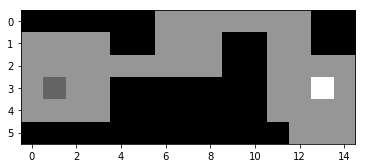

In [69]:
import numpy as np
import matplotlib.pyplot as plt


def display_2dlist(list):
    a = np.array(list)
    print(a)
    plt.imshow(a, cmap='gray')
    plt.show()
#background
X=0
#board
O=150

#target hole:
T=255


#block lying down
L=200
'''block standing up, here 100 is more darker than 200. 
This is the reason that i am using a samller value to represent the standing up
'''
#block stand up
U=100

initial_state_list=[[X, X, X, X, X, X, O, O, O, O, O, O, O, X, X],
                    [O, O, O, O, X, X, O, O, O, X, X, O, O, X, X],
                    [O, O, O, O, O, O, O, O, O, X, X, O, O, O, O],
                    [O, U, O, O, X, X, X, X, X, X, X, O, O, T, O],
                    [O, O, O, O, X, X, X, X, X, X, X, O, O, O, O],
                    [X, X, X, X, X, X, X, X, X, X, X, X, O, O, O]]
display_2dlist(initial_state_list)